## TP2.1 : Stratégies d'investissement 

*Notebook fait par Alexandre Boistard, Ethan Trentin.*

Nous allons dans un premier temps télécharger les données en sélectionnant dix titres financiers de secteurs différents (dont un du secteur minier et un du secteur bancaire). 
Nous prenons les actifs suivants : 
- Secteur Technologique : AAPL (Apple Inc.)
- Secteur Énergétique : XOM (Exxon Mobil Corporation)
- Secteur de la Santé : JNJ (Johnson & Johnson)
- Secteur Industriel : CAT (Caterpillar Inc.)
- Secteur des Biens de Consommation : PG (Procter & Gamble Co.)
- Secteur des Télécommunications : VZ (Verizon Communications Inc.)
- Secteur Minier : BHP (BHP Group Limited)
- Secteur Bancaire : JPM (JPMorgan Chase & Co.)
- Secteur Immobilier : SPG (Simon Property Group, Inc.)
- Secteur des Matériaux : FCX (Freeport-McMoRan Inc.)

In [72]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math

In [73]:
# On créé un dataframe poiur stocker les données
df = pd.DataFrame()
tickers = ["AAPL", "XOM", "JNJ", "CAT", "PG", "VZ", "BHP", "JPM","SPG", "FCX"]
for ticker in tickers:
    df[ticker] = yf.download(ticker, start="2006-01-01", end="2020-01-01")["Close"]
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,XOM,JNJ,CAT,PG,VZ,BHP,JPM,SPG,FCX
Date,,,,,,,,,,
2006-01-03,2.249496,30.437778,35.278313,35.372650,34.234394,10.366924,15.545201,24.241716,33.139278,18.278095
2006-01-04,2.256118,30.489834,35.822113,36.272266,34.298462,10.670632,15.896075,24.101803,33.223793,19.336334
2006-01-05,2.238361,30.338861,35.673290,36.272266,34.187805,10.793475,15.571848,24.174805,33.591389,18.705269
2006-01-06,2.296142,30.937532,35.833561,36.994408,34.152847,10.836687,15.878315,24.345133,34.043499,19.106564
2006-01-09,2.288617,30.921911,36.056805,37.667595,34.409138,10.881620,16.135920,24.740540,34.318172,18.960938
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,68.823021,54.453613,126.020630,131.665863,110.010033,45.698841,39.975224,118.455147,109.546898,12.250640
2019-12-26,70.188484,54.539165,125.934250,132.326523,110.010033,45.706291,40.232136,119.712189,110.185638,12.420399
2019-12-27,70.161858,54.352524,125.865166,132.380112,110.774361,45.885265,40.320221,119.798286,110.914635,12.288363


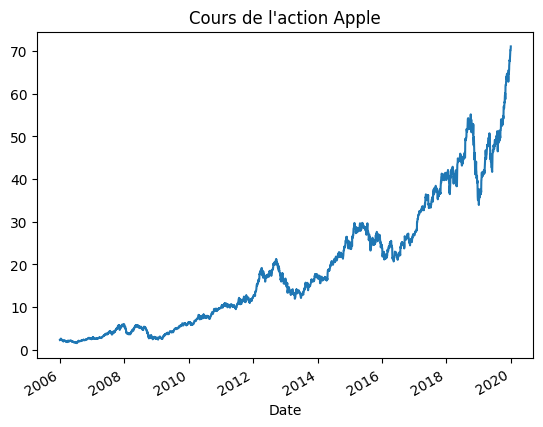

In [74]:
df["AAPL"].plot()
plt.title("Cours de l'action Apple")
plt.show()

In [75]:
# On calcule les log-rendements pour chacun des stocks
for ticker in tickers:
    df[ticker + " Log Returns"] = np.log(df[ticker]).diff()
df = df.dropna()
df

,AAPL,XOM,JNJ,CAT,PG,VZ,BHP,JPM,SPG,FCX,AAPL Log Returns,XOM Log Returns,JNJ Log Returns,CAT Log Returns,PG Log Returns,VZ Log Returns,BHP Log Returns,JPM Log Returns,SPG Log Returns,FCX Log Returns
Date,,,,,,,,,,,,,,,,,,,,
2006-01-04,2.256118,30.489834,35.822113,36.272266,34.298462,10.670632,15.896075,24.101803,33.223793,19.336334,0.002939,0.001709,0.015297,0.025115,0.001870,0.028875,0.022320,-0.005788,0.002547,0.056283
2006-01-05,2.238361,30.338861,35.673290,36.272266,34.187805,10.793475,15.571848,24.174805,33.591389,18.705269,-0.007902,-0.004964,-0.004163,0.000000,-0.003232,0.011446,-0.020608,0.003024,0.011003,-0.033181
2006-01-06,2.296142,30.937532,35.833561,36.994408,34.152847,10.836687,15.878315,24.345133,34.043499,19.106564,0.025486,0.019541,0.004483,0.019713,-0.001023,0.003996,0.019490,0.007021,0.013369,0.021227
2006-01-09,2.288617,30.921911,36.056805,37.667595,34.409138,10.881620,16.135920,24.740540,34.318172,18.960938,-0.003283,-0.000505,0.006211,0.018033,0.007476,0.004138,0.016093,0.016111,0.008036,-0.007651
2006-01-10,2.433368,31.161369,36.119781,37.514603,34.275162,10.926559,15.904961,24.777048,34.681526,19.721439,0.061329,0.007714,0.001745,-0.004070,-0.003901,0.004121,-0.014417,0.001475,0.010532,0.039325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,68.823021,54.453613,126.020630,131.665863,110.010033,45.698841,39.975224,118.455147,109.546898,12.250640,0.000950,-0.003849,-0.003489,-0.006893,0.002559,-0.001956,-0.001101,0.002766,0.005503,0.010836
2019-12-26,70.188484,54.539165,125.934250,132.326523,110.010033,45.706291,40.232136,119.712189,110.185638,12.420399,0.019646,0.001570,-0.000686,0.005005,0.000000,0.000163,0.006406,0.010556,0.005814,0.013762
2019-12-27,70.161858,54.352524,125.865166,132.380112,110.774361,45.885265,40.320221,119.798286,110.914635,12.288363,-0.000379,-0.003428,-0.000549,0.000405,0.006924,0.003908,0.002187,0.000719,0.006594,-0.010687


#### 1. Moyennes mobiles

*1. Nous allons d'abord implémenter une stratégie à deux paramètres, par exemple un croisement de moyennes mobiles de longueur A et B (ou EMA avec différents paramètres) sous forme de fonctions.*

In [76]:
def ema_crossover_strategy(df, tickers, short_window, long_window):
    """
    Implements a simple EMA crossover strategy.
    
    Args:
        df : pandas.DataFrame
            DataFrame with the adjusted close prices of stocks.
        tickers : list
            List of ticker symbols corresponding to the columns in df.
        short_window : int
            The short EMA window (using half-life or span as intended).
        long_window : int
            The long EMA window.
    
    Returns:
        signals : pandas.DataFrame
            DataFrame with the signals and EMA values for each stock.
    """
    signals = pd.DataFrame(index=df.index)
    
    for stock in tickers:
        # Compute the short and long EMAs. Change half_life to span if desired.
        signals[stock + " Short EMA"] = df[stock].ewm(halflife =short_window).mean()
        signals[stock + " Long EMA"] = df[stock].ewm(halflife =long_window).mean()
        
        # Generate signals: 1 if short EMA > long EMA, else -1.
        signals[stock + " Signal"] = np.where(
            signals[stock + " Short EMA"] > signals[stock + " Long EMA"],
            1,
            -1
        )
    
    return signals


In [77]:
# On applique la stratégie à nos données
signals = ema_crossover_strategy(df, tickers, 10, 50)
signals

,AAPL Short EMA,AAPL Long EMA,AAPL Signal,XOM Short EMA,XOM Long EMA,XOM Signal,JNJ Short EMA,JNJ Long EMA,JNJ Signal,CAT Short EMA,...,BHP Signal,JPM Short EMA,JPM Long EMA,JPM Signal,SPG Short EMA,SPG Long EMA,SPG Signal,FCX Short EMA,FCX Long EMA,FCX Signal
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-04,2.256118,2.256118,-1,30.489834,30.489834,-1,35.822113,35.822113,-1,36.272266,...,-1,24.101803,24.101803,-1,33.223793,33.223793,-1,19.336334,19.336334,-1
2006-01-05,2.246932,2.247178,-1,30.411733,30.413824,-1,35.745124,35.747186,-1,36.272266,...,-1,24.139568,24.138557,1,33.413958,33.408865,1,19.009870,19.018614,-1
2006-01-06,2.264484,2.263726,1,30.599278,30.590819,1,35.776668,35.776378,1,36.529844,...,-1,24.212890,24.208372,1,33.638507,33.623349,1,19.044360,19.048338,-1
2006-01-09,2.271159,2.270079,1,30.688506,30.675321,1,35.854143,35.847949,1,36.844502,...,1,24.358818,24.344193,1,33.826476,33.800683,1,19.021288,19.026032,-1
2006-01-10,2.308246,2.303648,1,30.796621,30.775245,1,35.914879,35.903833,1,36.997714,...,1,24.454442,24.433181,1,34.021974,33.981770,1,19.181371,19.168996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,65.250082,56.479256,1,53.936897,54.717777,-1,120.680387,115.581107,1,128.643055,...,1,115.005288,103.959229,1,110.890423,114.775386,-1,11.342447,10.352783,1
2019-12-26,65.580792,56.667995,1,53.977229,54.715318,-1,121.032223,115.723642,1,128.889725,...,1,115.320495,104.176104,1,110.843226,114.712198,-1,11.414634,10.381248,1
2019-12-27,65.887572,56.853769,1,54.002361,54.710323,-1,121.355871,115.863264,1,129.123466,...,1,115.620360,104.391179,1,110.848008,114.659915,-1,11.473145,10.407504,1


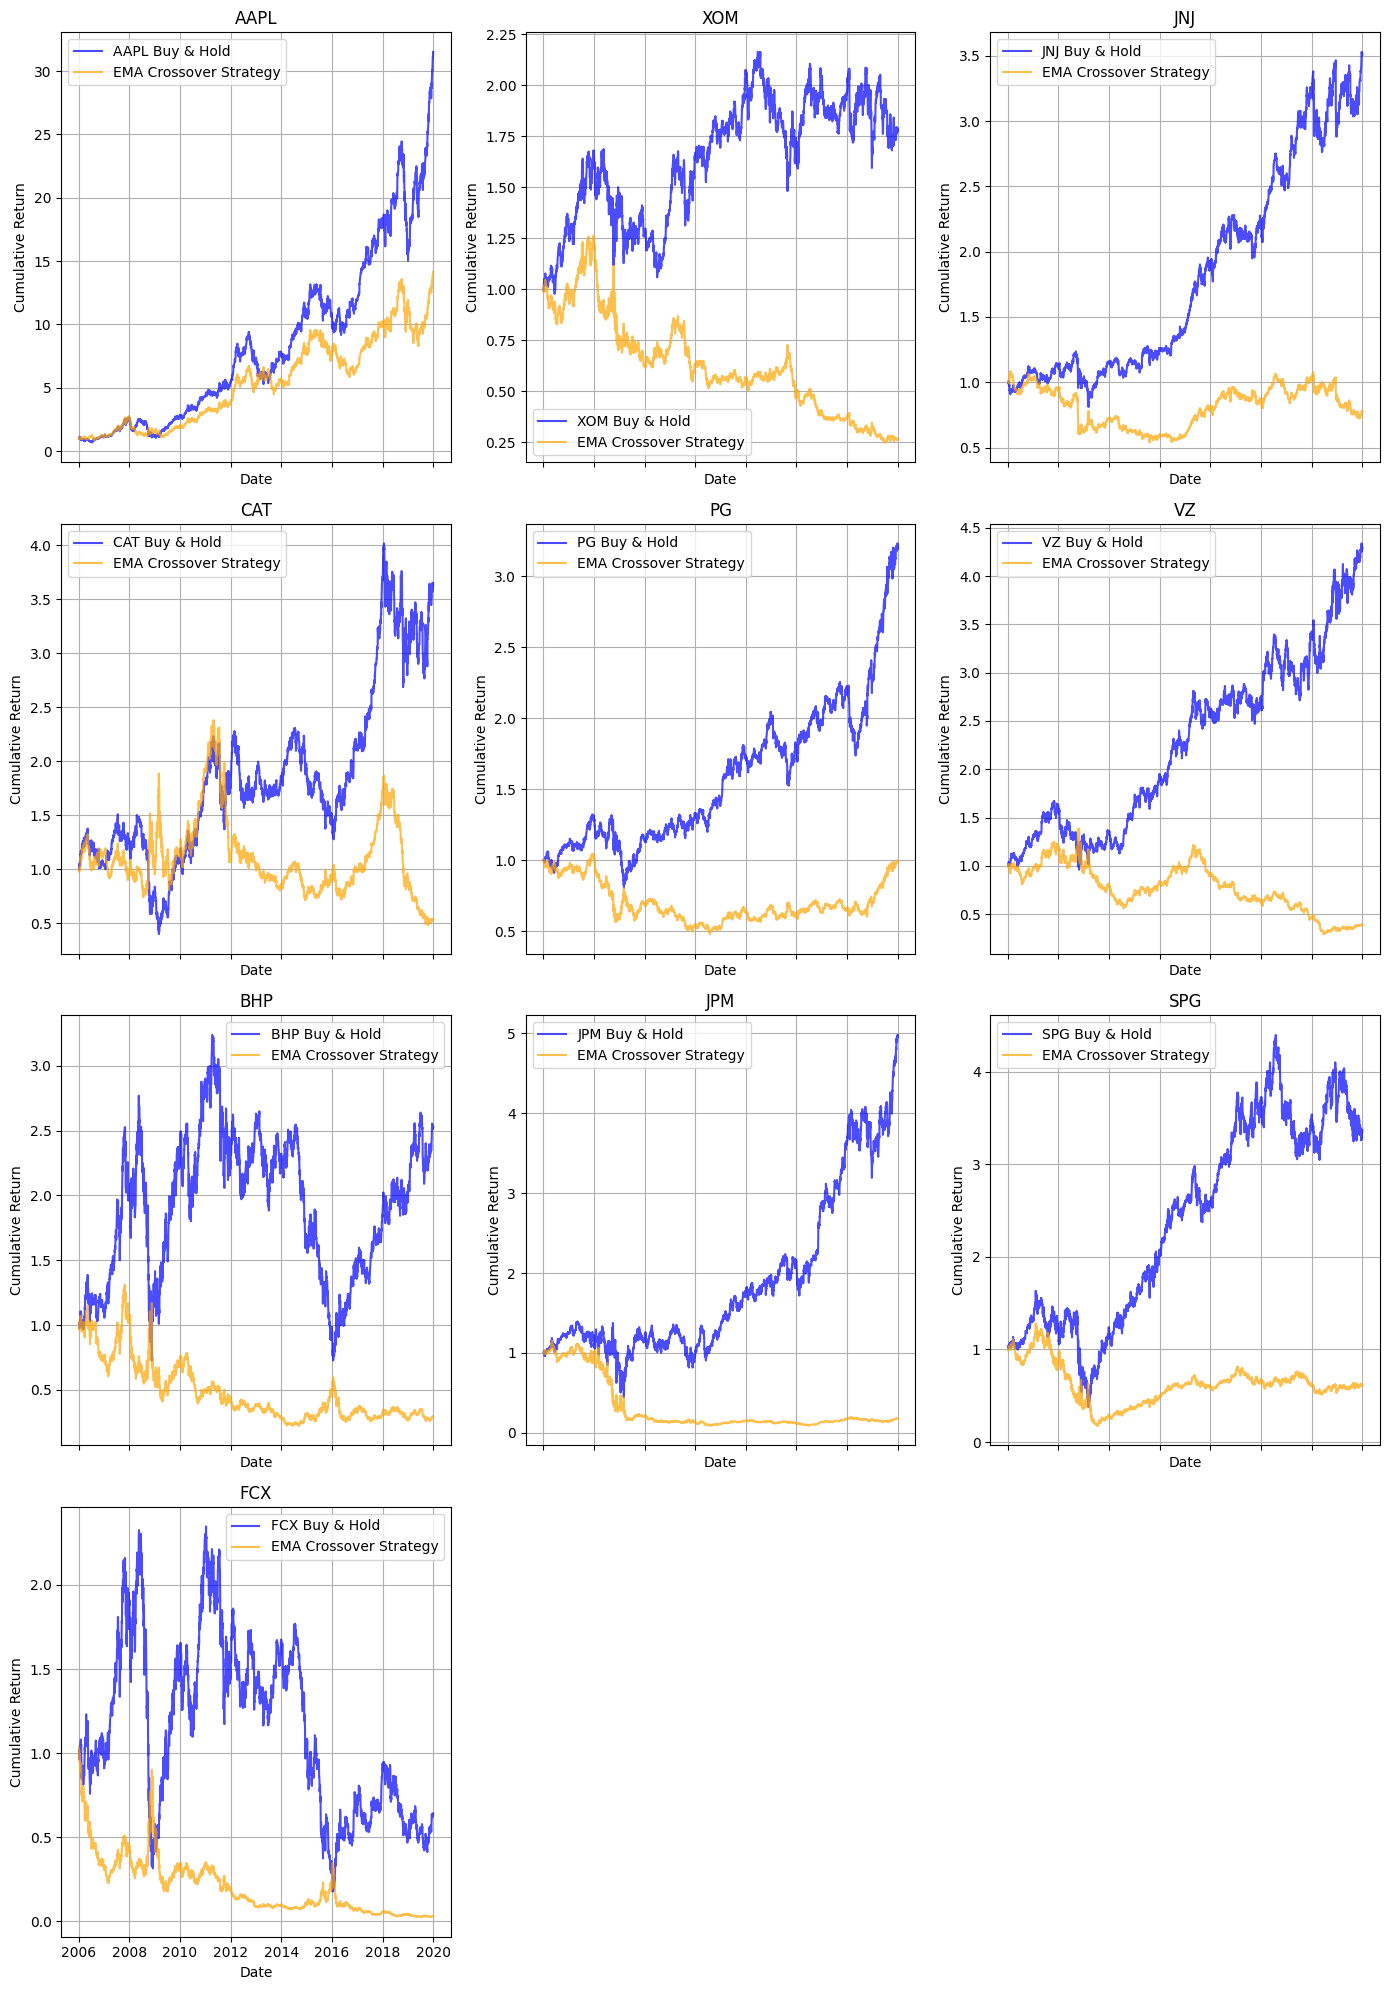

In [78]:
import matplotlib.pyplot as plt

# Make a copy of your DataFrame to avoid modifying the original
df_question1 = df.copy()

# Calculate returns and cumulative returns for each stock
for stock in tickers:
    df_question1.loc[:, stock + '_return'] = df_question1[stock].pct_change()
    df_question1.loc[:, stock + '_Strategy_return'] = signals[stock + ' Signal'].shift(1) * df_question1[stock + '_return']
    df_question1.loc[:, 'Cumulative_' + stock] = (1 + df_question1[stock + '_return']).cumprod()
    df_question1.loc[:, stock + '_Cumulative_Strategy'] = (1 + df_question1[stock + '_Strategy_return']).cumprod()

n_tickers = len(tickers)
ncols = 3
nrows = math.ceil(n_tickers / ncols)

# Create a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 5 * nrows), sharex=True, 
                         sharey=False)
axes = axes.flatten()  # flatten the grid for easier iteration

# Loop through each ticker and plot on its corresponding subplot.
for idx, stock in enumerate(tickers):
    ax = axes[idx]
    ax.plot(df_question1.index, df_question1['Cumulative_' + stock],
            label=stock + ' Buy & Hold', color='blue', alpha=0.7)
    ax.plot(df_question1.index, df_question1[stock + '_Cumulative_Strategy'],
            label='EMA Crossover Strategy', color='orange', alpha=0.7)
    ax.set_title(f'{stock}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Return')
    ax.legend()
    ax.grid(True)

# Remove any empty subplots if the total number of tickers is not a multiple of 4.
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()